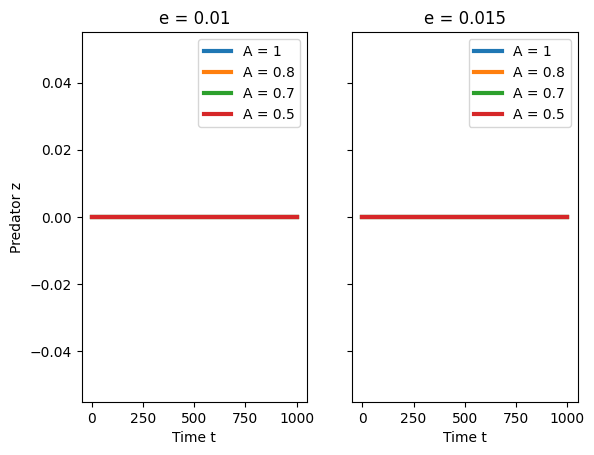

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


# a1 = (A1 * K0) / (R0 * B1)
a1 = 5.0

# a2 = (A2 * K0 * C2) / (B2 * R0 * C1)
a2 = 0.1

# b1 = K0 / B1
b1 = 3.0

# b2 = K0 / (B2 * C1)
b2 = 2.0

# c = (C1 * B2) / K0
c = 0.45

# d1 = D1 / R0
d1 = 0.4

# d2 = D2 / R0
d2 = 0.01

# e = E / R0
e1 = 0.01
e2 = 0.015

A1 = 1
A2 = 0.8
A3 = 0.7
A4 = 0.5


def derivative(state, t, A, e):
    x, y, z = state

    dxdt = (x * (1 - x)) - ((a1 * x * y)/(1 + (b1 * x)))
    dydt = ((a1 * x * y) / (1 + (b1 * x))) - ((a2* A * y * z)/(1 + (b2 * y))) - (d1 * y)
    dzdt = ((a2 * z) * (((A * y) / (1 + (b2 * y))) + (c * (1 - A)))) - (d2 * z) - (e * z)

    return np.array([dxdt, dydt, dzdt])

t = np.linspace(0, 1000, 5)

state0_1 = [0, 0, 0]

state1 = odeint(derivative, state0, t, args = (A1, e1))
state2 = odeint(derivative, state0, t, args = (A2, e1))
state3 = odeint(derivative, state0, t, args = (A3, e1))
state4 = odeint(derivative, state0, t, args = (A4, e1))

state5 = odeint(derivative, state0, t, args = (A1, e2))
state6 = odeint(derivative, state0, t, args = (A2, e2))
state7 = odeint(derivative, state0, t, args = (A3, e2))
state8 = odeint(derivative, state0, t, args = (A4, e2))

x1, y1, z1 = state1.T
x2, y2, z2 = state2.T
x3, y3, z3 = state3.T
x4, y4, z4 = state4.T

x5, y5, z5 = state5.T
x6, y6, z6 = state6.T
x7, y7, z7 = state7.T
x8, y8, z8 = state8.T

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True)

ax1.plot(t, z1, '-', linewidth = 3, label = 'A = 1')
ax1.plot(t, z2, '-', linewidth = 3, label = 'A = 0.8')
ax1.plot(t, z3, '-', linewidth = 3, label = 'A = 0.7')
ax1.plot(t, z4, '-', linewidth = 3, label = 'A = 0.5')
ax1.set_ylabel('Predator z')
ax1.set_xlabel('Time t')
ax1.set_title('e = 0.01')
ax1.legend()

ax2.plot(t, z5, '-', linewidth = 3, label = 'A = 1')
ax2.plot(t, z6, '-', linewidth = 3, label = 'A = 0.8')
ax2.plot(t, z7, '-', linewidth = 3, label = 'A = 0.7')
ax2.plot(t, z8, '-', linewidth = 3, label = 'A = 0.5')
ax2.set_xlabel('Time t')
ax2.set_title('e = 0.015')
ax2.legend()

plt.show()




